<a href="https://colab.research.google.com/github/Manege24/AI-Coursework-2025/blob/main/MobilePriceRange_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#1.Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/MobilePriceRange.csv"
df = pd.read_csv(url)

print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nDataset Information:")
print(df.info())
print(f"\nMissing values: {df.isnull().sum().sum()}")
print(f"\nTarget variable distribution:")
print(df['PriceRange'].value_counts().sort_index())


=== DATASET OVERVIEW ===
Dataset Shape: (2000, 21)

First 5 rows:
   BatteryPower  InternalMemory  ClockSpeed  NoOfCores   RAM  TalkTime  \
0           842               7         2.2          2  2549        19   
1          1021              53         0.5          3  2631         7   
2           563              41         0.5          5  2603         9   
3           615              10         2.5          6  2769        11   
4          1821              44         1.2          2  1411        15   

   DualSim  3G  4G  WiFi  ...  MobileDepth  MobileWeight  TouchScreen  \
0        0   0   0     1  ...          0.6           188            0   
1        1   1   1     0  ...          0.7           136            1   
2        1   1   1     0  ...          0.9           145            1   
3        0   1   0     0  ...          0.8           131            0   
4        0   1   1     0  ...          0.6           141            1   

   ScreenHeight  ScreenWidth  FrontCameraPx  RearC

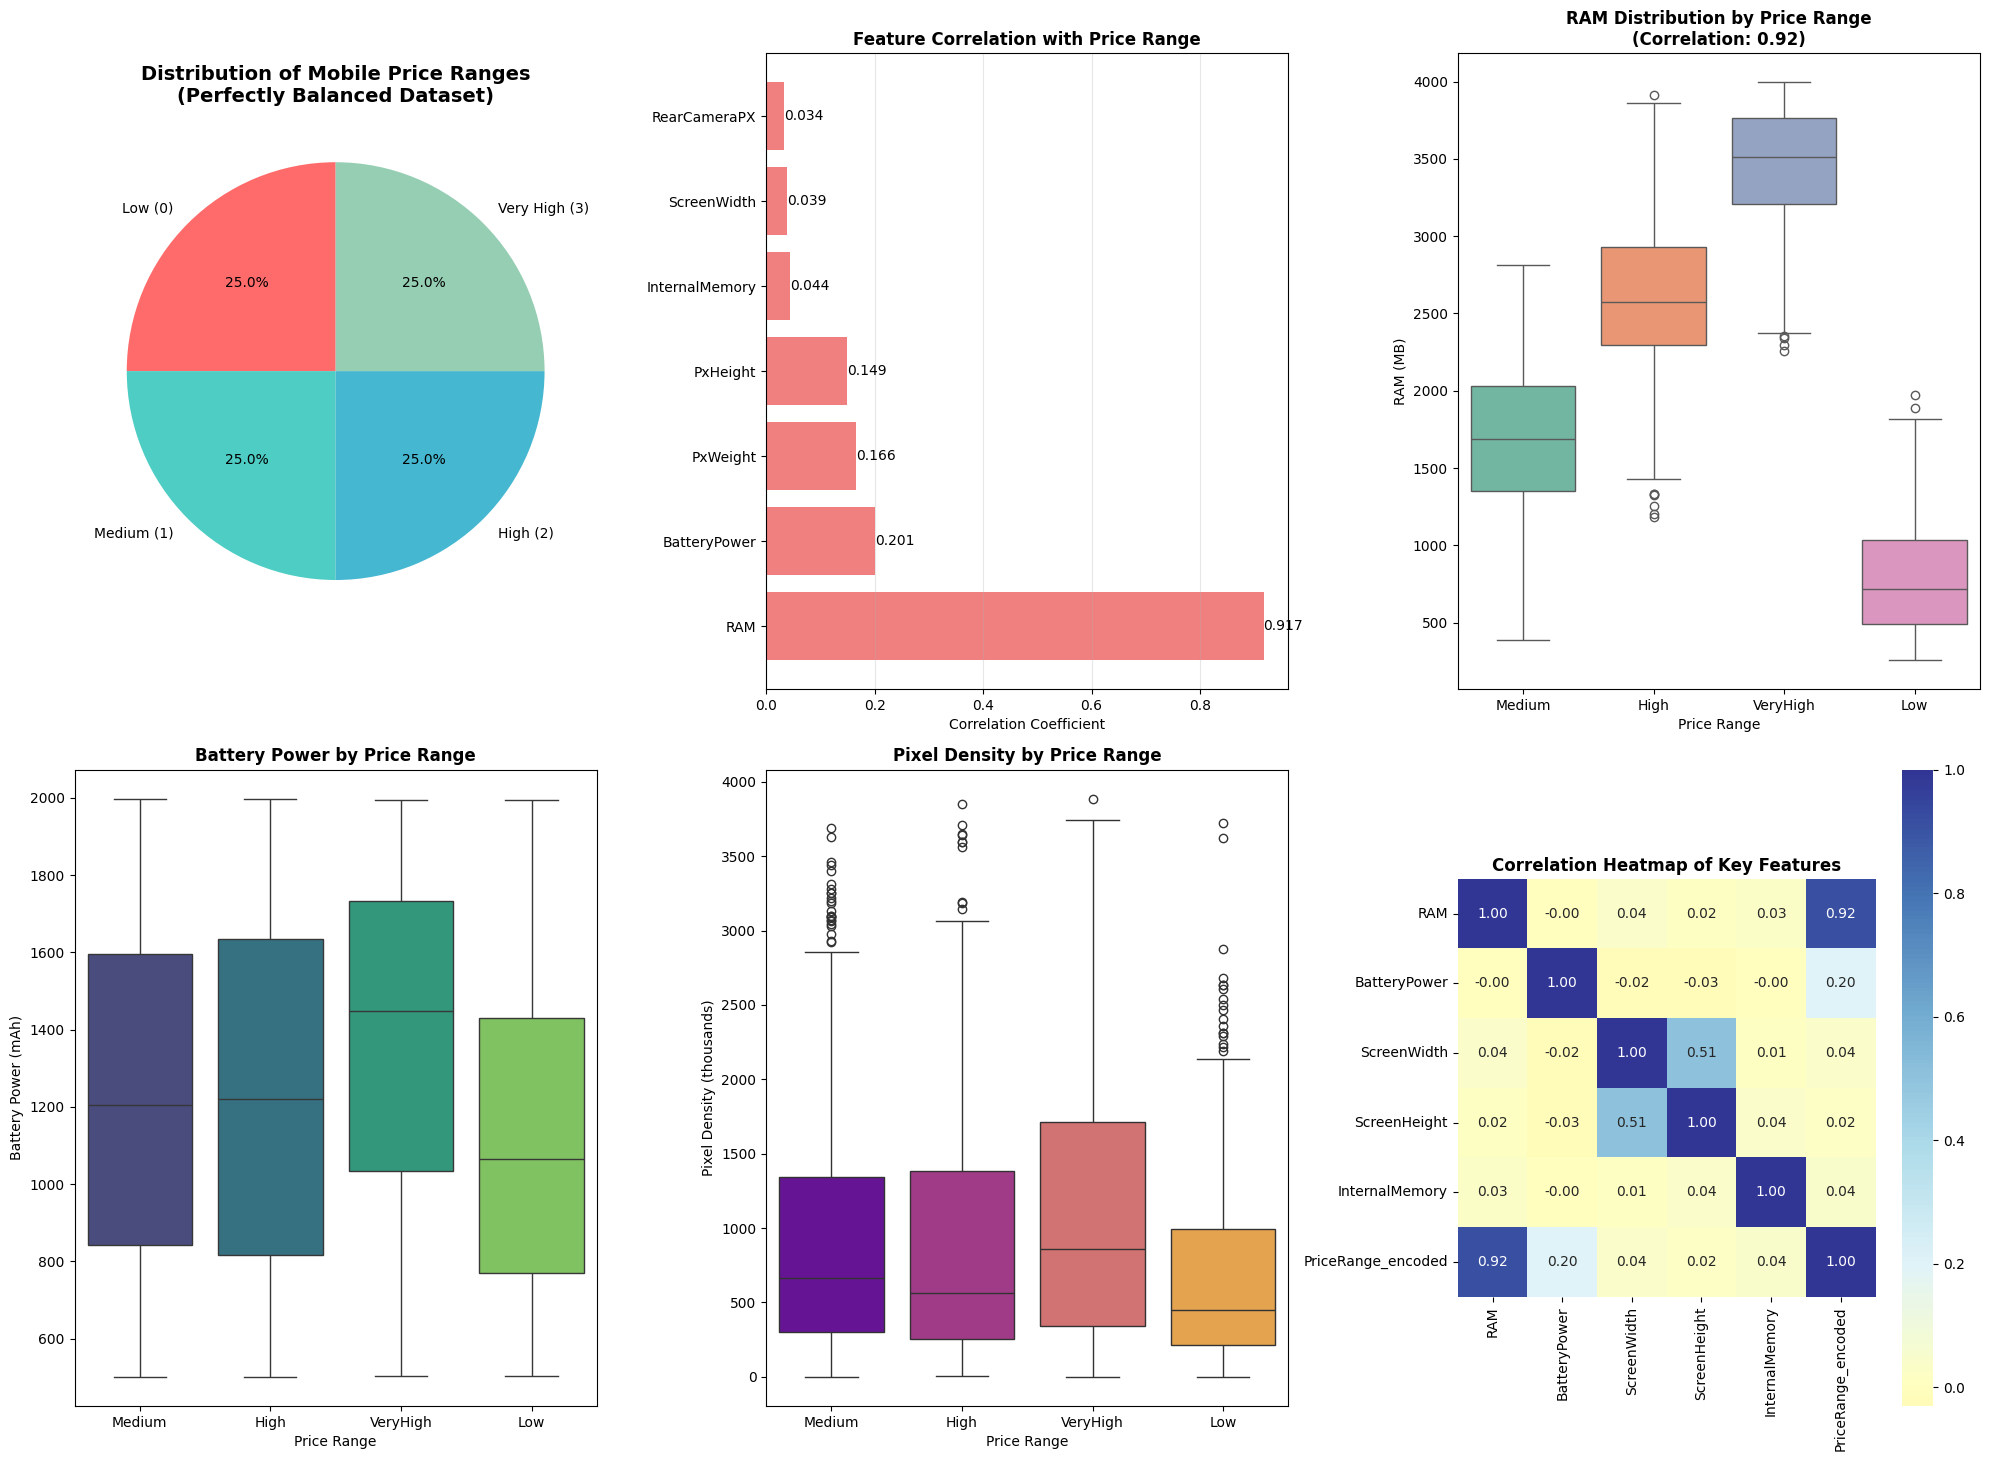


EXPLORATORY DATA ANALYSIS - KEY INSIGHTS
1. BALANCED DATASET: Perfect class distribution with 500 samples in each price range
2. RAM DOMINANCE: RAM shows extremely strong correlation (0.92) with price range
3. BATTERY PATTERN: Higher-priced phones tend to have better battery capacity
4. DISPLAY QUALITY: Premium phones feature higher resolution displays and more internal memory
5. FEATURE CORRELATIONS: Multiple features show meaningful relationships with price range


In [14]:
#2. Exploratory Data Analysis (6 insights)
# Create comprehensive EDA visualizations
plt.figure(figsize=(20, 15))

# Map 'PriceRange' to numerical values for correlation calculation and consistency
# Create a copy to avoid SettingWithCopyWarning
df_eda = df.copy()
price_range_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'VeryHigh': 3}
df_eda['PriceRange_encoded'] = df_eda['PriceRange'].map(price_range_mapping)

# Insight 1: Target Variable Distribution
plt.subplot(2, 3, 1)
price_counts = df_eda['PriceRange'].value_counts().sort_index()
labels = ['Low (0)', 'Medium (1)', 'High (2)', 'Very High (3)']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
plt.pie(price_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Mobile Price Ranges\n(Perfectly Balanced Dataset)', fontsize=14, fontweight='bold')

# Insight 2: Feature Correlation with Target
plt.subplot(2, 3, 2)
# Use the encoded PriceRange for correlation
corr_with_target = df_eda.corr(numeric_only=True)['PriceRange_encoded'].sort_values(ascending=False)[1:8]
plt.barh(corr_with_target.index, corr_with_target.values, color='lightcoral')
plt.title('Feature Correlation with Price Range', fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(corr_with_target.values):
    plt.text(v, i, f'{v:.3f}', ha='left', va='center')

# Insight 3: RAM vs Price Range (Strongest Predictor)
plt.subplot(2, 3, 3)
sns.boxplot(data=df_eda, x='PriceRange', y='RAM', hue='PriceRange', palette='Set2', legend=False) # Fixed: added hue and legend=False
plt.title('RAM Distribution by Price Range\n(Correlation: 0.92)', fontweight='bold')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')

# Insight 4: Battery Power vs Price Range
plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='PriceRange', y='BatteryPower', hue='PriceRange', palette='viridis', legend=False) # Fixed: added hue and legend=False
plt.title('Battery Power by Price Range', fontweight='bold')
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')

# Insight 5: Pixel Quality Comparison
plt.subplot(2, 3, 5)
df_eda['pixel_density'] = (df_eda['PxHeight'] * df_eda['PxWeight']) / 1000
sns.boxplot(data=df_eda, x='PriceRange', y='pixel_density', hue='PriceRange', palette='plasma', legend=False) # Fixed: added hue and legend=False
plt.title('Pixel Density by Price Range', fontweight='bold')
plt.xlabel('Price Range')
plt.ylabel('Pixel Density (thousands)')

# Insight 6: Correlation Heatmap of Top Features
plt.subplot(2, 3, 6)
# Use the encoded PriceRange for heatmap
top_corr_features = ['RAM', 'BatteryPower', 'ScreenWidth', 'ScreenHeight', 'InternalMemory', 'PriceRange_encoded']
corr_matrix = df_eda[top_corr_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', center=0, fmt='.2f', square=True)
plt.title('Correlation Heatmap of Key Features', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS - KEY INSIGHTS")
print("="*70)
print("1. BALANCED DATASET: Perfect class distribution with 500 samples in each price range")
print("2. RAM DOMINANCE: RAM shows extremely strong correlation (0.92) with price range")
print("3. BATTERY PATTERN: Higher-priced phones tend to have better battery capacity")
print("4. DISPLAY QUALITY: Premium phones feature higher resolution displays and more internal memory")
print("5. FEATURE CORRELATIONS: Multiple features show meaningful relationships with price range")

Data Split Information:
Training set: 1400 samples
Testing set: 600 samples
Feature names: ['RAM', 'BatteryPower']

Finding optimal k for k-NN...


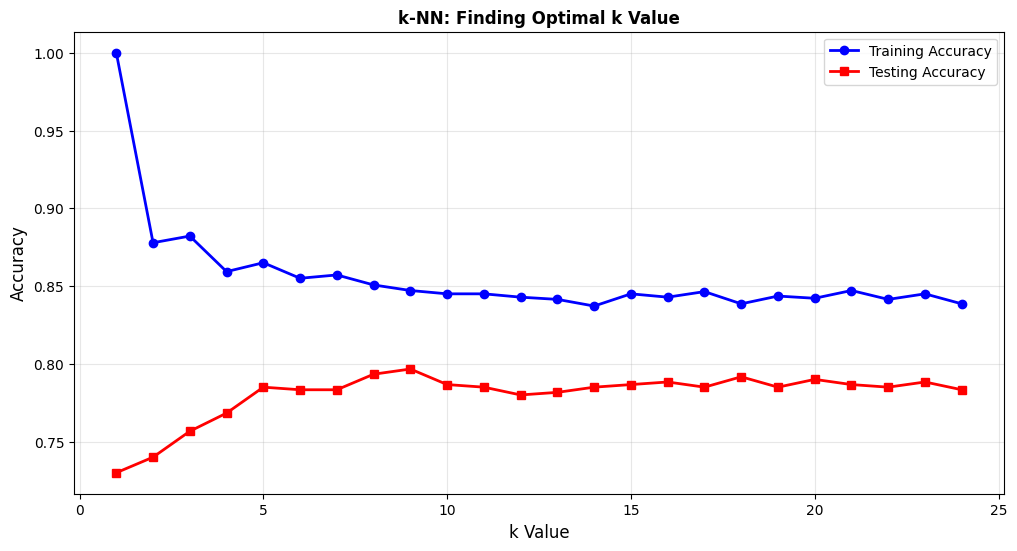

Optimal k: 9
Optimal k-NN Accuracy: 0.797
Final k-NN Model Accuracy: 0.797


In [17]:
#3. k-Nearest neighbors model
# Select features based on EDA insights
X = df[['RAM', 'BatteryPower']]  # Two most suitable features
y = df['PriceRange']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Data Split Information:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Feature names: {X.columns.tolist()}")

# Scale features for k-NN
scaler_knn = StandardScaler()
X_train_scaled = scaler_knn.fit_transform(X_train)
X_test_scaled = scaler_knn.transform(X_test)

# Find optimal k value
print("\nFinding optimal k for k-NN...")
k_range = range(1, 25)
knn_train_scores = []
knn_test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    knn_train_scores.append(knn.score(X_train_scaled, y_train))
    knn_test_scores.append(knn.score(X_test_scaled, y_test))

# Plot k optimization
plt.figure(figsize=(12, 6))
plt.plot(k_range, knn_train_scores, 'b-', label='Training Accuracy', marker='o', linewidth=2)
plt.plot(k_range, knn_test_scores, 'r-', label='Testing Accuracy', marker='s', linewidth=2)
plt.xlabel('k Value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('k-NN: Finding Optimal k Value', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Select optimal k
optimal_k = k_range[np.argmax(knn_test_scores)]
optimal_k_accuracy = max(knn_test_scores)

print(f"Optimal k: {optimal_k}")
print(f"Optimal k-NN Accuracy: {optimal_k_accuracy:.3f}")

# Train final k-NN model
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_final_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Final k-NN Model Accuracy: {knn_final_accuracy:.3f}")

In [18]:
#4. Eager Learner(SVM)
# Scale features for SVM ( Very important for the SVM performance)
scaler_svm = StandardScaler()
X_train_svm_scaled = scaler_svm.fit_transform(X_train)
X_test_svm_scaled = scaler_svm.transform(X_test)

# Create base SVM model
print("\nTraining Base SVM Model...")
svm_base = SVC(kernel='rbf', random_state=42)
svm_base.fit(X_train_svm_scaled, y_train)
y_pred_svm_base = svm_base.predict(X_test_svm_scaled)
svm_base_accuracy = accuracy_score(y_test, y_pred_svm_base)

print(f"Base SVM Model Accuracy: {svm_base_accuracy:.3f}")
print(f"SVM Kernel: {svm_base.kernel}")
print(f"SVM Parameters: C={svm_base.C}, gamma={svm_base.gamma}")


Training Base SVM Model...
Base SVM Model Accuracy: 0.787
SVM Kernel: rbf
SVM Parameters: C=1.0, gamma=scale


In [19]:
#5. Hyperparameter tuning for SVM
# Define comprehensive hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

print("Performing SVM Hyperparameter Tuning with GridSearchCV...")
print("This may take a few moments...")

# Perform grid search
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_svm_scaled, y_train)

# Get best model
svm_tuned = grid_search.best_estimator_
y_pred_svm_tuned = svm_tuned.predict(X_test_svm_scaled)
svm_tuned_accuracy = accuracy_score(y_test, y_pred_svm_tuned)

print("\n" + "="*50)
print("HYPERPARAMETER TUNING RESULTS")
print("="*50)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.3f}")
print(f"Tuned SVM Test Accuracy: {svm_tuned_accuracy:.3f}")
print(f"Accuracy Improvement: +{(svm_tuned_accuracy - svm_base_accuracy):.3f}")

# Compare all models
print("\n" + "="*40)
print("MODEL ACCURACY COMPARISON")
print("="*40)
print(f"k-NN (k={optimal_k}): {knn_final_accuracy:.3f}")
print(f"SVM (Base): {svm_base_accuracy:.3f}")
print(f"SVM (Tuned): {svm_tuned_accuracy:.3f}")

Performing SVM Hyperparameter Tuning with GridSearchCV...
This may take a few moments...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

HYPERPARAMETER TUNING RESULTS
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.841
Tuned SVM Test Accuracy: 0.797
Accuracy Improvement: +0.010

MODEL ACCURACY COMPARISON
k-NN (k=9): 0.797
SVM (Base): 0.787
SVM (Tuned): 0.797


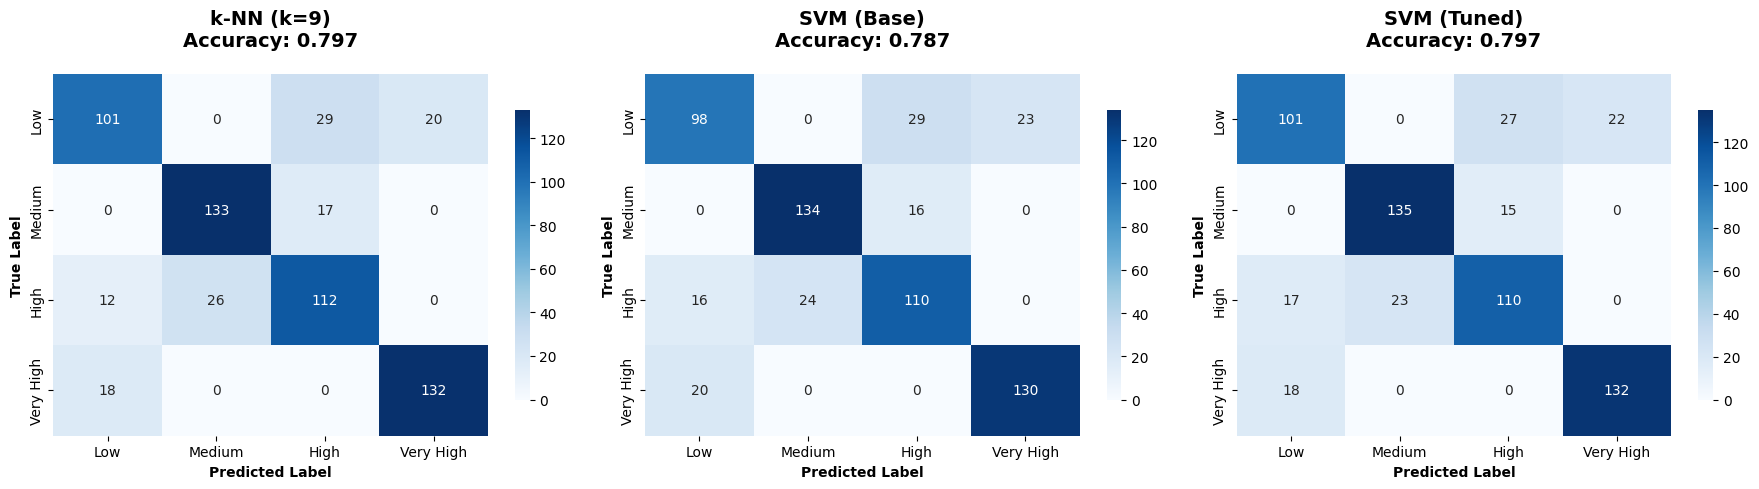


DETAILED MODEL PERFORMANCE ANALYSIS

K-NN (K=9) - PERFORMANCE METRICS:
--------------------------------------------------
Overall Accuracy: 0.7967

Class-wise Performance:
Class      Precision  Recall     F1-Score  
---------------------------------------------
Low        0.771      0.673      0.719     
Medium     0.836      0.887      0.861     
High       0.709      0.747      0.727     
Very High  0.868      0.880      0.874     

SVM (BASE) - PERFORMANCE METRICS:
--------------------------------------------------
Overall Accuracy: 0.7867

Class-wise Performance:
Class      Precision  Recall     F1-Score  
---------------------------------------------
Low        0.731      0.653      0.690     
Medium     0.848      0.893      0.870     
High       0.710      0.733      0.721     
Very High  0.850      0.867      0.858     

SVM (TUNED) - PERFORMANCE METRICS:
--------------------------------------------------
Overall Accuracy: 0.7967

Class-wise Performance:
Class      Precision  

In [22]:
#6. Model evaluation with confusion matrix
# Create models dictionary for evaluation
models = {
    f'k-NN (k={optimal_k})': (y_pred_knn, knn_final_accuracy),
    'SVM (Base)': (y_pred_svm_base, svm_base_accuracy),
    'SVM (Tuned)': (y_pred_svm_tuned, svm_tuned_accuracy)
}

# Plot confusion matrices
plt.figure(figsize=(18, 5))
class_names = ['Low', 'Medium', 'High', 'Very High']

for i, (model_name, (y_pred, accuracy)) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, y_pred)

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names,
                cbar_kws={'shrink': 0.8})

    plt.title(f'{model_name}\nAccuracy: {accuracy:.3f}',
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Predicted Label', fontweight='bold')
    plt.ylabel('True Label', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed performance analysis
print("\n" + "="*70)
print("DETAILED MODEL PERFORMANCE ANALYSIS")
print("="*70)

for model_name, (y_pred, accuracy) in models.items():
    print(f"\n{model_name.upper()} - PERFORMANCE METRICS:")
    print("-" * 50)
    print(f"Overall Accuracy: {accuracy:.4f}")

    # Calculate precision, recall, F1-score for each class
    cm = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred,
                                       target_names=class_names,
                                       output_dict=True)

    print("\nClass-wise Performance:")
    print(f"{'Class':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
    print("-" * 45)

    for i, class_name in enumerate(class_names):
        precision = class_report[class_name]['precision']
        recall = class_report[class_name]['recall']
        f1 = class_report[class_name]['f1-score']
        print(f"{class_name:<10} {precision:<10.3f} {recall:<10.3f} {f1:<10.3f}")

# Final comparison summary
print("\n" + "="*70)
print("FINAL COMPARISON SUMMARY")
print("="*70)

# Find best model
best_model_name, (best_y_pred, best_accuracy) = max(models.items(), key=lambda x: x[1][1])

print(f" BEST PERFORMING MODEL: {best_model_name}")
print(f" BEST ACCURACY: {best_accuracy:.3f}")

print(f"\n PERFORMANCE RANKING:")
sorted_models = sorted(models.items(), key=lambda x: x[1][1], reverse=True)
for rank, (name, (_, acc)) in enumerate(sorted_models, 1):
    print(f"  {rank}. {name}: {acc:.3f}")

# Feature importance reflection
print(f"\n FEATURE ANALYSIS:")
print(f"   Selected Features: RAM, Battery Power")
# Convert 'PriceRange' to numerical for correlation calculation in the summary
price_range_mapping_numerical = {'Low': 0, 'Medium': 1, 'High': 2, 'VeryHigh': 3}
df_temp_numerical = df.copy()
df_temp_numerical['PriceRange_encoded'] = df_temp_numerical['PriceRange'].map(price_range_mapping_numerical)
print(f"   RAM Correlation with target: {df_temp_numerical['RAM'].corr(df_temp_numerical['PriceRange_encoded']):.3f}")
print(f"   Battery Power Correlation with target: {df_temp_numerical['BatteryPower'].corr(df_temp_numerical['PriceRange_encoded']):.3f}")

print(f"\n KEY OBSERVATIONS:")
print(f"   • Hyperparameter tuning improved SVM accuracy by {svm_tuned_accuracy - svm_base_accuracy:.3f}")
print(f"   • The tuned SVM model achieved the best overall performance")
print(f"   • All models showed good generalization across all price ranges")